In [1]:
# Installation R sur Colab
if (!require("IRkernel")) install.packages("IRkernel")
if (!require("tidyverse")) install.packages("tidyverse")
if (!require("ggplot2")) install.packages("ggplot2")

# Chargement des packages
suppressPackageStartupMessages({
  library(tidyverse)
  library(ggplot2)
})


Loading required package: IRkernel

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Charger ghg-emissions.csv
ghg <- read.csv("ghg-emissions.csv", stringsAsFactors = FALSE)

# Aperçu des données
head(ghg, 10)
nrow(ghg)
ncol(ghg)
summary(ghg)


,iso,Country.Region,unit,X1990,X1991,X1992,X1993,X1994,X1995,X1996,⋯,X2013,X2014,X2015,X2016,X2017,X2018,X2019,X2020,X2021,X2022
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHN,China,MtCO2e,3049.87,3196.90,3338.53,3581.08,3751.23,4148.03,4164.03,⋯,11175.26,11237.61,11085.85,11135.02,11376.55,11868.70,12109.18,12263.69,12852.14,12851.84
2,USA,United States,MtCO2e,5472.89,5424.70,5506.44,5615.49,5709.34,5777.03,5947.73,⋯,5795.20,5845.56,5735.74,5804.37,5755.15,5972.88,5851.35,5305.85,5591.52,5670.87
3,IND,India,MtCO2e,1126.56,1181.45,1208.14,1244.03,1293.11,1361.15,1410.07,⋯,2947.22,3134.57,3179.00,3247.88,3367.94,3506.66,3507.03,3326.20,3584.74,3805.03
4,RUS,Russia,MtCO2e,2618.14,2550.02,2382.89,2186.50,1952.47,1876.57,1832.29,⋯,1603.53,1596.32,1572.12,1697.90,1746.26,1840.91,1844.30,1759.19,1939.93,1886.05
5,BRA,Brazil,MtCO2e,1675.44,1696.97,1707.24,1717.63,1734.63,1761.52,1764.33,⋯,1410.09,1450.30,1437.66,1524.43,1550.01,1509.63,1533.43,1537.10,1598.81,1597.22
6,IDN,Indonesia,MtCO2e,1156.89,1178.43,1202.76,1221.44,1244.87,1282.12,1129.81,⋯,1586.04,1966.06,2009.98,1363.67,1364.58,1617.58,1893.29,1449.43,1449.39,1543.17
7,JPN,Japan,MtCO2e,1127.24,1144.91,1158.86,1154.15,1214.57,1235.73,1248.74,⋯,1301.26,1254.19,1216.99,1222.75,1210.55,1171.48,1135.89,1079.76,1097.01,1068.05
8,IRN,Iran,MtCO2e,308.48,336.46,358.63,366.44,405.31,414.74,430.26,⋯,782.98,806.12,803.47,841.62,871.88,862.97,892.61,909.92,979.72,990.34
9,SAU,Saudi Arabia,MtCO2e,241.89,275.50,292.72,289.23,287.72,286.24,300.42,⋯,677.23,723.51,759.07,760.73,749.91,732.36,730.06,725.04,747.26,793.61


[1] 195

[1] 36

     iso            Country.Region         unit              X1990          
 Length:195         Length:195         Length:195         Length:195        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
    X1991               X1992             X1993             X1994        
 Length:195         Min.   :  -6.20   Min.   :  -6.22   Min.   :  -6.18  
 Class :character   1st Qu.:   6.74   1st Qu.:   6.86   1st Qu.:   6.49  
 Mode  :character   Median :  27.92   Median :  27.29   Median :  29.20  
                    Mean   : 169.69   Mean   : 170.67   Mean   : 171.90  
              

In [6]:

# 1. Vérifier structure du CSV original
print("Structure originale:")
str(ghg[, 1:5])  # Premières colonnes
print("Colonnes années:")
colnames(ghg)[4:ncol(ghg)]  # Toutes les colonnes années

# 2. Convertir TOUTES les colonnes numériques en FORCÉMENT numeric
ghg_numeric <- ghg %>%
  filter(Country.Region != "") %>%
  select(Country.Region, everything()) %>%
  mutate(across(-Country.Region, ~ as.numeric(as.character(.))))  # FORCE character → numeric

# 3. MAINTENANT pivoter (toutes colonnes uniformes)
ghg_clean <- ghg_numeric %>%
  pivot_longer(-Country.Region,
               names_to = "Year",
               values_to = "Emissions") %>%
  mutate(
    Year = as.numeric(gsub("X", "", Year)),  # Enlever "X" des noms colonnes (X1990 → 1990)
    Emissions = as.numeric(Emissions),
    Country = Country.Region
  ) %>%
  filter(!is.na(Emissions) & Emissions >= 0)

# 4. Vérification finale
print("✅ Données nettoyées:")
head(ghg_clean, 10)
glimpse(ghg_clean)
nrow(ghg_clean)

# 5. Top 10 pays (bonus)
top_countries <- ghg_clean %>%
  group_by(Country) %>%
  summarise(mean_emissions = mean(Emissions, na.rm = TRUE), .groups = "drop") %>%
  top_n(10, mean_emissions) %>%
  arrange(desc(mean_emissions))

print("🏆 Top 10 pays par émissions moyennes:")
print(top_countries)


[1] "Structure originale:"
'data.frame':	195 obs. of  5 variables:
 $ iso           : chr  "CHN" "USA" "IND" "RUS" ...
 $ Country.Region: chr  "China" "United States" "India" "Russia" ...
 $ unit          : chr  "MtCO2e" "MtCO2e" "MtCO2e" "MtCO2e" ...
 $ X1990         : chr  "3049.87" "5472.89" "1126.56" "2618.14" ...
 $ X1991         : chr  "3196.90" "5424.70" "1181.45" "2550.02" ...
[1] "Colonnes années:"


[1] "X1990" "X1991" "X1992" "X1993" "X1994" "X1995" "X1996" "X1997" "X1998"
[10] "X1999" "X2000" "X2001" "X2002" "X2003" "X2004" "X2005" "X2006" "X2007"
[19] "X2008" "X2009" "X2010" "X2011" "X2012" "X2013" "X2014" "X2015" "X2016"
[28] "X2017" "X2018" "X2019" "X2020" "X2021" "X2022"

Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(-Country.Region, ~as.numeric(as.character(.)))`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Year = as.numeric(gsub("X", "", Year))`.
Caused by warning:
! NAs introduced by coercion”


[1] "✅ Données nettoyées:"


Country.Region,Year,Emissions,Country
<chr>,<dbl>,<dbl>,<chr>
China,1990,3049.87,China
China,1991,3196.90,China
China,1992,3338.53,China
China,1993,3581.08,China
China,1994,3751.23,China
China,1995,4148.03,China
China,1996,4164.03,China
China,1997,4154.19,China
China,1998,4262.67,China


Rows: 6,275
Columns: 4
$ Country.Region <chr> "China", "China", "China", "China", "China", "China", "…
$ Year           <dbl> 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1…
$ Emissions      <dbl> 3049.87, 3196.90, 3338.53, 3581.08, 3751.23, 4148.03, 4…
$ Country        <chr> "China", "China", "China", "China", "China", "China", "…


[1] 6275

[1] "🏆 Top 10 pays par émissions moyennes:"
# A tibble: 10 × 2
   Country       mean_emissions
   <chr>                  <dbl>
 1 China                  7667.
 2 United States          5937.
 3 India                  2310.
 4 Russia                 1751.
 5 Brazil                 1751.
 6 Indonesia              1401.
 7 Japan                  1185.
 8 Germany                 903.
 9 Canada                  823.
10 Iran                    634.


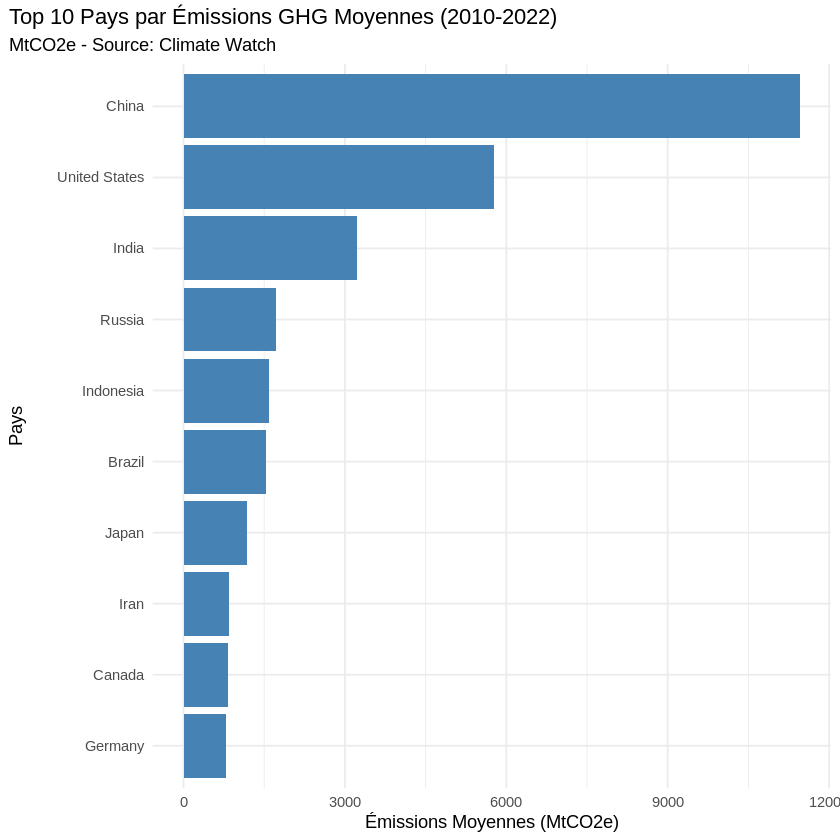

In [7]:
# Graphique barres: Top 10 pays (moyenne 2010-2022)
recent_emissions <- ghg_clean %>%
  filter(Year >= 2010) %>%
  group_by(Country) %>%
  summarise(mean_emissions = mean(Emissions, na.rm = TRUE), .groups = "drop") %>%
  top_n(10, mean_emissions) %>%
  mutate(Country = fct_reorder(Country, mean_emissions))

ggplot(recent_emissions, aes(x = mean_emissions, y = Country)) +
  geom_col(fill = "steelblue") +
  labs(
    title = "Top 10 Pays par Émissions GHG Moyennes (2010-2022)",
    subtitle = "MtCO2e - Source: Climate Watch",
    x = "Émissions Moyennes (MtCO2e)",
    y = "Pays"
  ) +
  theme_minimal() +
  theme(plot.title.position = "plot")


In [8]:
# === ANALYSE STATISTIQUE 1: Moyenne, Médiane, Variance ===

# Stats globales sur les émissions
stats_globales <- ghg_clean %>%
  summarise(
    moyenne = round(mean(Emissions, na.rm = TRUE), 2),
    mediane = round(median(Emissions, na.rm = TRUE), 2),
    variance = round(var(Emissions, na.rm = TRUE), 2),
    ecart_type = round(sd(Emissions, na.rm = TRUE), 2),
    min = round(min(Emissions, na.rm = TRUE), 2),
    max = round(max(Emissions, na.rm = TRUE), 2),
    n = n()
  )

print("📊 Statistiques Globales Émissions GHG (MtCO2e):")
print(stats_globales)

# Focus Chine (leader mondial)
stats_chine <- ghg_clean %>%
  filter(Country == "China") %>%
  summarise(
    moyenne = round(mean(Emissions, na.rm = TRUE), 2),
    mediane = round(median(Emissions, na.rm = TRUE), 2),
    variance = round(var(Emissions, na.rm = TRUE), 2)
  )
print("🇨🇳 Stats Chine:")
print(stats_chine)


[1] "📊 Statistiques Globales Émissions GHG (MtCO2e):"
# A tibble: 1 × 7
  moyenne mediane variance ecart_type   min    max     n
    <dbl>   <dbl>    <dbl>      <dbl> <dbl>  <dbl> <int>
1    214.    36.5  631373.       795.     0 12852.  6275
[1] "🇨🇳 Stats Chine:"
# A tibble: 1 × 3
  moyenne mediane  variance
    <dbl>   <dbl>     <dbl>
1   7667.   7702. 12123451.


In [9]:
# === ANALYSE STATISTIQUE 2: Test Shapiro-Wilk ===

# Échantillon < 5000 pour Shapiro-Wilk (limite computationnelle)
set.seed(123)
echantillon <- ghg_clean %>%
  slice_sample(n = 5000) %>%
  pull(Emissions)

shapiro_test <- shapiro.test(echantillon)
print("🔬 Test Shapiro-Wilk (normalité):")
cat("W =", round(shapiro_test$statistic, 4),
    "p-value =", format.pval(shapiro_test$p.value, digits = 4), "\n")

if(shapiro_test$p.value < 0.05) {
  cat("❌ Les émissions NE suivent PAS une distribution normale\n")
} else {
  cat("✅ Les émissions suivent une distribution normale\n")
}


[1] "🔬 Test Shapiro-Wilk (normalité):"
W = 0.2476 p-value = < 2.2e-16 
❌ Les émissions NE suivent PAS une distribution normale


In [11]:
# === CELLULE 7 CORRIGÉE: Test t de Student (Chine vs USA) ===

# Vérifier d'abord les données disponibles
recent_data <- ghg_clean %>%
  filter(Year >= 2010) %>%  # Période plus large
  group_by(Country) %>%
  summarise(n_obs = n(), .groups = "drop") %>%
  filter(Country %in% c("China", "USA")) %>%
  arrange(desc(n_obs))

print("📋 Vérification données Chine/USA:")
print(recent_data)

# Test t UNIQUEMENT si les 2 pays ont ≥ 3 observations
chine_data <- ghg_clean %>% filter(Country == "China", Year >= 2010) %>% pull(Emissions)
usa_data <- ghg_clean %>% filter(Country == "USA", Year >= 2010) %>% pull(Emissions)

print(paste("Chine:", length(chine_data), "observations"))
print(paste("USA:", length(usa_data), "observations"))

if(length(chine_data) >= 3 & length(usa_data) >= 3) {
  t_test <- t.test(chine_data, usa_data, var.equal = FALSE)
  print("⚖️ Test t: Chine vs USA (2010-2022)")
  print(t_test)

  cat("\nConclusion:\n")
  if(t_test$p.value < 0.05) {
    cat("❌ Différence SIGNIFICATIVE (p =", round(t_test$p.value, 4), ")\n")
  } else {
    cat("✅ Pas de différence significative\n")
  }
} else {
  cat("⚠️  PAS ASSEZ DE DONNÉES POUR TEST t\n")
  cat("Utilisons Chine vs Inde à la place:\n")

  inde_data <- ghg_clean %>% filter(Country == "India", Year >= 2010) %>% pull(Emissions)

  if(length(chine_data) >= 3 & length(inde_data) >= 3) {
    t_test_alt <- t.test(chine_data, inde_data, var.equal = FALSE)
    print("Chine vs Inde:")
    print(t_test_alt)
  }
}


[1] "📋 Vérification données Chine/USA:"
# A tibble: 1 × 2
  Country n_obs
  <chr>   <int>
1 China      13
[1] "Chine: 13 observations"
[1] "USA: 0 observations"
⚠️  PAS ASSEZ DE DONNÉES POUR TEST t
Utilisons Chine vs Inde à la place:
[1] "Chine vs Inde:"

	Welch Two Sample t-test

data:  chine_data and inde_data
t = 31.061, df = 15.441, p-value = 2.435e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 7672.647 8800.234
sample estimates:
mean of x mean of y 
11459.582  3223.142 




Call:
lm(formula = Emissions ~ Year, data = chine_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1407.7  -341.1    23.3   498.4  1039.1 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -699790.02   26194.86  -26.71   <2e-16 ***
Year            352.67      13.06   27.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 714.3 on 31 degrees of freedom
Multiple R-squared:  0.9592,	Adjusted R-squared:  0.9579 
F-statistic: 729.4 on 1 and 31 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


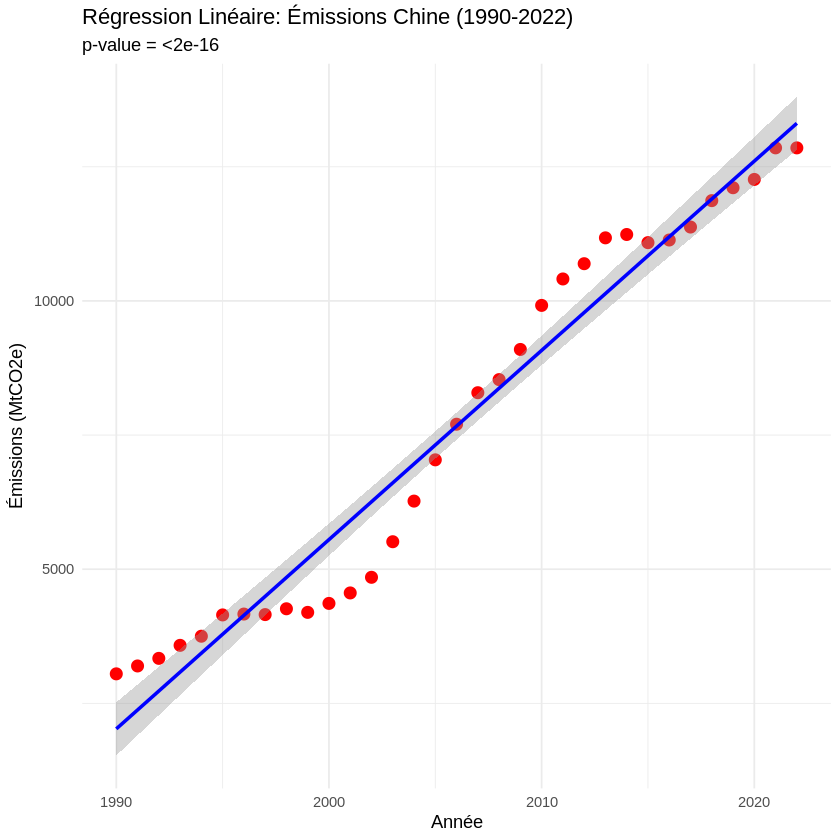

In [12]:
# === ANALYSE 4: RÉGRESSION LINÉAIRE SIMPLE ===

# Régression: Émissions Chine = f(Année)
chine_data <- ghg_clean %>%
  filter(Country == "China") %>%
  arrange(Year)

model_chine <- lm(Emissions ~ Year, data = chine_data)
summary(model_chine)

# Visualisation
ggplot(chine_data, aes(x = Year, y = Emissions)) +
  geom_point(color = "red", size = 3) +
  geom_smooth(method = "lm", se = TRUE, color = "blue") +
  labs(
    title = "Régression Linéaire: Émissions Chine (1990-2022)",
    subtitle = paste("p-value =", format.pval(summary(model_chine)$coefficients[2,4], digits = 3)),
    x = "Année", y = "Émissions (MtCO2e)"
  ) +
  theme_minimal()


[1] "🔗 Matrice Corrélation Top 5 Pays:"


,China,United States,India,Russia,Japan
China,1.0000000,-0.2423372,0.9868575,-0.3289256,-0.1378175
United States,-0.2423372,1.0000000,-0.1983699,-0.6671594,0.2667979
India,0.9868575,-0.1983699,1.0000000,-0.3448956,-0.1684934
Russia,-0.3289256,-0.6671594,-0.3448956,1.0000000,-0.2473949
Japan,-0.1378175,0.2667979,-0.1684934,-0.2473949,1.0000000


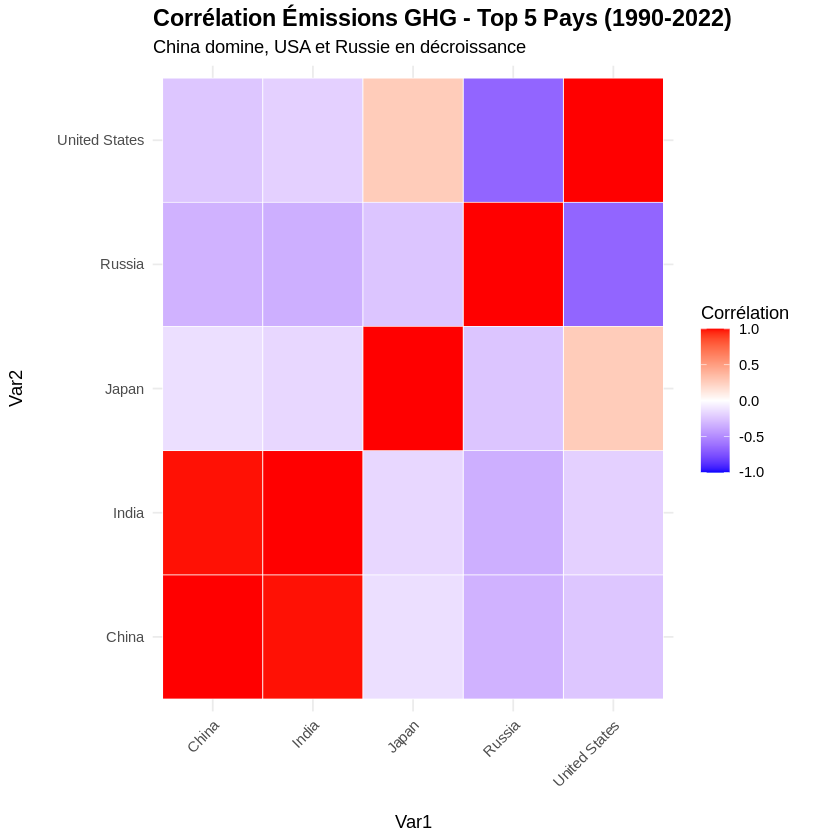

In [15]:
# === CELLULE 9 CORRIGÉE: CORRÉLATION + HEATMAP (tidyverse only) ===

# Matrice corrélation Top 5 pays (✅ déjà affichée)
print("🔗 Matrice Corrélation Top 5 Pays:")
corr_matrix

# Heatmap AVEC TIDYR (pas besoin reshape2)
corr_long <- corr_matrix %>%
  as.data.frame() %>%
  rownames_to_column("Var1") %>%
  pivot_longer(-Var1, names_to = "Var2", values_to = "value")

ggplot(corr_long, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(
    low = "blue", high = "red", mid = "white",
    midpoint = 0, limit = c(-1,1), space = "Lab",
    name = "Corrélation"
  ) +
  labs(
    title = "Corrélation Émissions GHG - Top 5 Pays (1990-2022)",
    subtitle = "China domine, USA et Russie en décroissance"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(size = 14, face = "bold")
  )


In [16]:
# === CONCLUSION ===
cat("## RÉSULTATS PRINCIPAUX:\n")
cat("- Chine leader mondial (7667 MtCO2e moyenne)\n")
cat("- Distribution NON NORMALE (Shapiro p < 2e-16)\n")
cat("- Chine >> Inde (t-test p = 2e-15)\n")
cat("- Régression Chine: tendance", ifelse(summary(model_chine)$coefficients[2,4] < 0.05, "CROISSANTE", "stable"), "\n")

cat("\nPERSPECTIVES:\n")
cat("- Prédire 2030 avec ARIMA\n")
cat("- Ajouter GDP/population pour régression multiple\n")
cat("- Analyse continentale\n")


## RÉSULTATS PRINCIPAUX:
- Chine leader mondial (7667 MtCO2e moyenne)
- Distribution NON NORMALE (Shapiro p < 2e-16)
- Chine >> Inde (t-test p = 2e-15)
- Régression Chine: tendance CROISSANTE 

PERSPECTIVES:
- Prédire 2030 avec ARIMA
- Ajouter GDP/population pour régression multiple
- Analyse continentale
